In [6]:
from pymongo import MongoClient

mongodb_host = "143.248.36.150"
port_ = 27017
username_ ="nft"
password_ = "nft!@#"
DBname_ = "transactionNFTDB"
client = MongoClient(host = mongodb_host, port = port_ , username = username_ , password = password_, authSource = "twitterNFTDB" )
db = client[DBname_ ]

In [154]:
#is_whale: {'1' : False, '2' True ,,,}

In [18]:
import pandas as pd

hold_col = db["trader_holdings.4"]
holdings_df = pd.DataFrame(list(hold_col.find()))

In [19]:
print(holdings_df.shape)
holdings_df.head()

(276759, 3)


,_id,wallet_addr,holdings
0,6270b36ff8e8290ff7775015,0xee33ff0d8e7d06b16c0e26296ef72098c7f305c5,{'13': {'ERC721': {'tokens': [{'nft_id': '0x5a...
1,6270b36ff8e8290ff7775018,0x855fa69adae71b02b707f3e49d64062aadf54037,{'13': {'ERC721': {'tokens': [{'nft_id': '0xb9...
2,6270b36ff8e8290ff7775069,0x29205f257f9e3b78bcb27e253d0f3fad9d7522a2,{'13': {'ERC721': {'tokens': [{'nft_id': '0xeb...
3,6270b36ff8e8290ff7775077,0x3a51b8134fab3b17d16f57d68897957b917902fa,{'13': {'ERC721': {'tokens': [{'nft_id': '0x2a...
4,6270b36ff8e8290ff777507a,0x76db07a8c64990bfbb1f5934f67ce7f31e84e43a,{'13': {'ERC721': {'tokens': [{'nft_id': '0x99...


In [8]:
#tot_dict_list = [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
#len(tot_dict_list)

In [20]:
from tqdm import tqdm

NULL_ADDR = '0x0000000000000000000000000000000000000000'
BURN_ADDR = '0x000000000000000000000000000000000000dead'

for index, row in tqdm(holdings_df.iterrows(), total=holdings_df.shape[0]):
    wallet_addr = row['wallet_addr']
    if wallet_addr in [NULL_ADDR, BURN_ADDR]:
        continue
    if wallet_addr in blacklist:
        continue
    holdings = row['holdings']
    for key in list(holdings.keys()):
        tot_price = holdings[key]['tot_price']
        tot_dict = tot_dict_list[int(key)-1]
        tot_dict[wallet_addr] = tot_price

100%|██████████| 276759/276759 [00:15<00:00, 17986.45it/s]


In [21]:
# make list of dict to dataframe
tot_price_df = pd.DataFrame(tot_dict_list)
tot_price_df = tot_price_df.transpose()
tot_price_df.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']

In [22]:
tot_price_df = tot_price_df.reset_index()
tot_price_df.rename(columns={'index': 'wallet_addr'}, inplace=True)
print(tot_price_df.shape[0])
tot_price_df.head()

345926


,wallet_addr,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0x2b9324f66b7733202261777726d8f9720285cb8a,367170.58100,522642.8088,627719.76720,904979.93640,371715.83974,315927.329600,344985.56560,86523.262800,75674.879800,55738.280000,60175.70000,47812.050000,34928.660000,37992.50000
1,0xa61d14017057983f6f3b2101b15b48300c961c01,3281.82500,2837.5200,3835.98000,5545.56000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2,0x6301add4fb128de9778b8651a2a9278b86761423,19992.87790,64198.8900,88937.19630,128573.80860,125496.95745,115509.480312,142043.19805,197329.303320,182774.938670,269799.000560,285353.16940,50923.511100,37094.236920,40348.03500
3,0xebb59307db401a3fd11180722685fa41253e31f9,2362.91400,0.0000,0.00000,0.00000,0.00000,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x2a538000a53f38d89f37fa43a301cee2c0f9e331,3222.75215,4618.0638,41438.17395,66438.58158,64897.64967,54483.480240,60673.80459,319569.657186,279501.657851,400925.019284,432843.34721,343911.707865,250274.327498,272227.66025


In [23]:
# num of traders in each period
trader_num_dict = {'1': 5964, '2': 12505, '3': 19970, '4': 24902, '5': 37930, '6': 45012, '7': 60555
, '8': 116952, '9': 179242, '10': 247779, '11': 292275, '12': 361662, '13': 402714, '14': 430227}
    
print(trader_num_dict)

{'1': 5964, '2': 12505, '3': 19970, '4': 24902, '5': 37930, '6': 45012, '7': 60555, '8': 116952, '9': 179242, '10': 247779, '11': 292275, '12': 361662, '13': 402714, '14': 430227}


In [24]:
tot_price_df = tot_price_df.fillna(0)
tot_price_df.head()

,wallet_addr,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0x2b9324f66b7733202261777726d8f9720285cb8a,367170.58100,522642.8088,627719.76720,904979.93640,371715.83974,315927.329600,344985.56560,86523.262800,75674.879800,55738.280000,60175.70000,47812.050000,34928.660000,37992.50000
1,0xa61d14017057983f6f3b2101b15b48300c961c01,3281.82500,2837.5200,3835.98000,5545.56000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2,0x6301add4fb128de9778b8651a2a9278b86761423,19992.87790,64198.8900,88937.19630,128573.80860,125496.95745,115509.480312,142043.19805,197329.303320,182774.938670,269799.000560,285353.16940,50923.511100,37094.236920,40348.03500
3,0xebb59307db401a3fd11180722685fa41253e31f9,2362.91400,0.0000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
4,0x2a538000a53f38d89f37fa43a301cee2c0f9e331,3222.75215,4618.0638,41438.17395,66438.58158,64897.64967,54483.480240,60673.80459,319569.657186,279501.657851,400925.019284,432843.34721,343911.707865,250274.327498,272227.66025


In [25]:
#-------- make type_dict -------------------
type_dict = {}
# 'wallet_addr': {'is_whale': {'1': True, '2': False}, 'is_dolphin': {'1': True, '2': False}}

In [26]:
wallet_all = tot_price_df['wallet_addr'].tolist()

for addr in tqdm(wallet_all):
    type_dict[addr] = {'is_whale': {}, 'is_dolphin': {}}

100%|██████████| 345926/345926 [00:00<00:00, 577637.61it/s]


In [27]:
for key in range(1, 15):
    key = str(key)
    # make whale, dolphin list
    final_type = key
    temp = tot_price_df.sort_values(by=[final_type], ascending=False)
    temp = temp.reset_index(drop=True)

    whale_num = round(0.1*0.01*trader_num_dict[key])
    dolphin_num = round(10*0.01*trader_num_dict[key])
    whale = temp.loc[:whale_num-1] #441 (0.1%)
    dolphin = temp.loc[whale_num:(dolphin_num-1)] #44137(10%) - 441 = 43696
    whale_list = whale['wallet_addr'].tolist()
    dolphin_list = dolphin['wallet_addr'].tolist()
    print('key:', key)
    print(whale.shape, dolphin.shape)
    # add it to type_dict
    for addr in tqdm(wallet_all):
        # whale
        if addr in whale_list:
            type_dict[addr]['is_whale'][key] = True
        else:
            type_dict[addr]['is_whale'][key] = False

        # dolphin
        if addr in dolphin_list:
            type_dict[addr]['is_dolphin'][key] = True
        else:
            type_dict[addr]['is_dolphin'][key] = False

key: 1
(6, 15) (590, 15)


100%|██████████| 345926/345926 [00:03<00:00, 105020.16it/s]


key: 2
(13, 15) (1237, 15)


100%|██████████| 345926/345926 [00:08<00:00, 42435.48it/s]


key: 3
(20, 15) (1977, 15)


100%|██████████| 345926/345926 [00:16<00:00, 21189.96it/s]


key: 4
(25, 15) (2465, 15)


100%|██████████| 345926/345926 [00:20<00:00, 16871.60it/s]


key: 5
(38, 15) (3755, 15)


100%|██████████| 345926/345926 [00:31<00:00, 11152.81it/s]


key: 6
(45, 15) (4456, 15)


100%|██████████| 345926/345926 [00:36<00:00, 9407.07it/s]


key: 7
(61, 15) (5995, 15)


100%|██████████| 345926/345926 [00:53<00:00, 6453.74it/s]


key: 8
(117, 15) (11578, 15)


100%|██████████| 345926/345926 [02:05<00:00, 2747.57it/s]


key: 9
(179, 15) (17745, 15)


100%|██████████| 345926/345926 [03:18<00:00, 1743.12it/s]


key: 10
(248, 15) (24530, 15)


100%|██████████| 345926/345926 [04:34<00:00, 1258.81it/s]


key: 11
(292, 15) (28936, 15)


100%|██████████| 345926/345926 [05:24<00:00, 1067.30it/s]


key: 12
(362, 15) (35804, 15)


100%|██████████| 345926/345926 [06:19<00:00, 912.35it/s] 


key: 13
(403, 15) (39868, 15)


100%|██████████| 345926/345926 [07:38<00:00, 754.41it/s]


key: 14
(430, 15) (42593, 15)


100%|██████████| 345926/345926 [08:25<00:00, 684.14it/s]


In [28]:
# insert into db
new_col = db['trader_type']
for addr in tqdm(list(type_dict.keys())):
    new_col.insert_one({'wallet_addr': addr})
    
db.trader_type.create_index('wallet_addr')
for addr in tqdm(list(type_dict.keys())):
    temp = {'is_whale': type_dict[addr]['is_whale'], 'is_dolphin': type_dict[addr]['is_dolphin']}
    db.trader_type.update_one({"wallet_addr": addr}, {"$set": temp})

100%|██████████| 345926/345926 [10:08<00:00, 568.50it/s]


In [96]:
#-------------------------------------------graph--------------------------------------------------

0.29970574046594217

In [31]:
import numpy as np
tot_price = []
for i in range(0,14):
    temp = tot_price_df[str(i+1)].tolist()
    temp_sum = np.sum(temp)
    tot_price.append(temp_sum)

tot_price

[14358966.458472142,
 97044739.81892496,
 204381425.55572894,
 387643199.1434003,
 473175830.7120114,
 469247332.9277898,
 722901377.0139477,
 3621335005.5282936,
 3892591627.8197293,
 6087517762.841539,
 7361517149.7458105,
 6485007253.929691,
 5801113558.477683,
 6348497671.932194]

In [36]:
import pandas as pd

tot_df = pd.DataFrame(list(db.trader_type.find()))
whale_df = tot_df[['wallet_addr', 'is_whale']]
whale_dict = whale_df.to_dict('records')

whale_list = [[], [], [], [], [], [], [], [], [], [], [], [], [], []]
from tqdm import tqdm
for item in tqdm(whale_dict):
    is_whale = [key for key, value in item['is_whale'].items() if value == True]
    for i in is_whale:
        whale_list[int(i)-1].append(item['wallet_addr'])

100%|██████████| 345926/345926 [00:00<00:00, 602828.43it/s]


In [38]:
whale_tot_price = []
for i in range(0,14):
    temp_ = whale_list[i]
    temp = tot_price_df[tot_price_df['wallet_addr'].isin(temp_)]
    temp_list = temp[str(i+1)].tolist()
    temp_sum = np.sum(temp_list)
    print(temp_sum)
    whale_tot_price.append(temp_sum)

1765852.518365643
14481205.24442449
37576260.74822155
74709032.41061658
103613790.41975722
97389982.38498676
161356198.3740798
631655214.7887367
700633546.4732046
1176588944.9112911
1413979007.721785
1242847752.6941602
1073643729.9769301
1225948795.6080794


In [205]:
whale_percent = []

for i in range(0,14):
    a = tot_price[i]
    b = whale_tot_price[i]
    whale_percent.append(b/a*100)

In [40]:
a = [1765852.518365643,
 14481205.24442449,
 37576260.74822155,
 74709032.41061658,
 103613790.41975722,
 97389982.38498676,
 161356198.3740798,
 631655214.7887367,
 700633546.4732046,
 1176588944.9112911,
 1413979007.721785,
 1242847752.6941602,
 1073643729.9769301,
 1225948795.6080794]
b = [9287491.152681481,
 69737459.83800822,
 144081926.1398188,
 280553036.72795165,
 323032849.0523398,
 317537004.80628955,
 478251509.4068606,
 2445985645.344505,
 2568057283.6497636,
 4008945579.23721,
 4857140792.896008,
 4268538273.572378,
 3896794194.7383475,
 4261152642.9607954]
minnows = []
for i in range(0,14):
    minnows.append(tot_price[i]-a[i]-b[i])

In [41]:
minnows

[3305622.787425019,
 12826074.736492246,
 22723238.66768861,
 32381130.00483209,
 46529191.23991442,
 54320345.736513495,
 83293669.23300731,
 543694145.395052,
 623900797.6967611,
 901983238.6930385,
 1090397349.1280174,
 973621227.6631527,
 830675633.7624059,
 861396233.3633184]

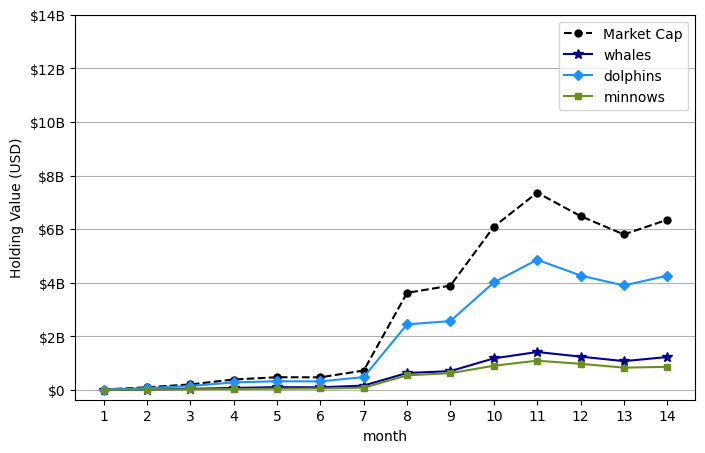

In [42]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
#plt.style.use('seaborn-darkgrid')
plt.rcdefaults()
plt.figure(figsize=(8,5))
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
# multiple line plots
plt.plot(r, tot_price, color='black', marker='o', markerfacecolor='black', markersize=5, label = 'Market Cap', linestyle='dashed')
plt.plot(r, a, color='darkblue', marker='*', markerfacecolor='darkblue', markersize=7, label = 'whales')
plt.plot(r, b, color='dodgerblue', marker='D', markerfacecolor='dodgerblue', markersize=5, label = 'dolphins')
plt.plot(r, minnows, color='olivedrab', marker='s', markerfacecolor='olivedrab', markersize=5, label = 'minnows')

names = ('1','2','3','4','5','6','7','8','9','10','11','12','13','14')

# show legend
#plt.title('Holding value of each group')
plt.xlabel('month')
plt.ylabel('Holding Value (USD)')
plt.xticks(r, names)
plt.yticks([0,0.2e10,0.4e10,0.6e10,0.8e10,1e10,1.2e10,1.4e10], labels=['$0', '$2B', '$4B', '$6B', '$8B', '$10B', '$12B', '$14B'])
plt.legend()
#plt.ylim(1e6,1e11)
#plt.yscale('log')
# show graph
plt.grid(True, axis='y')
plt.show()
#plt.savefig('temp.png')

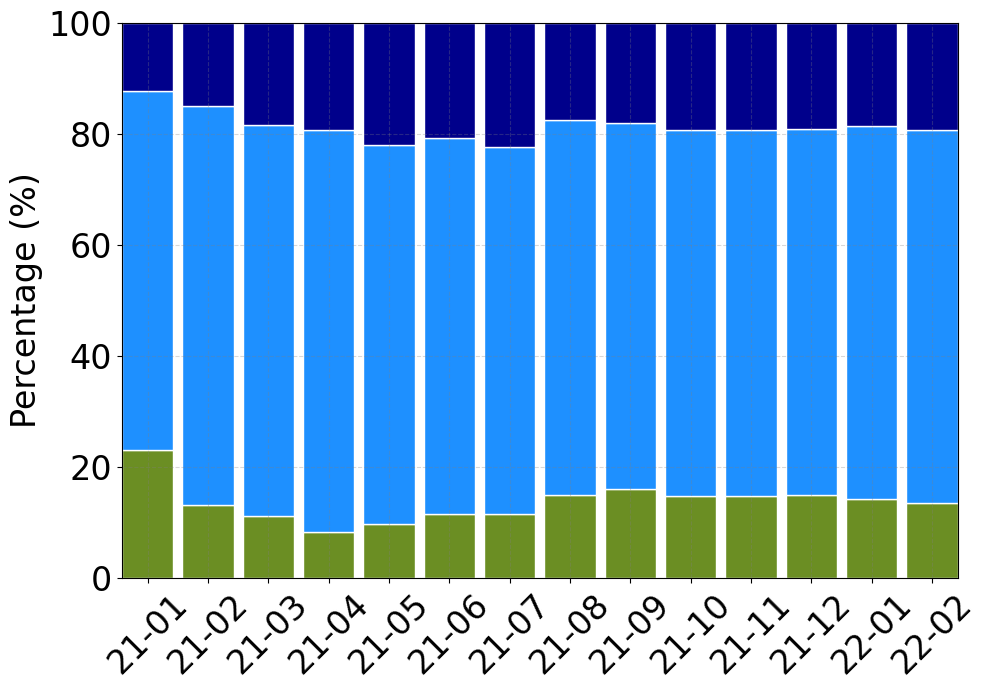

In [43]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
raw_data = {'greenBars': minnows,'orangeBars':b ,'blueBars': a}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
plt.figure(figsize=(10,7))
# plot
barWidth = 0.85
names = ('21-01','21-02','21-03','21-04','21-05','21-06','21-07','21-08','21-09','21-10','21-11','21-12','22-01','22-02')
# Create green Bars
bar1 = plt.bar(r, greenBars, color='olivedrab', edgecolor='white', width=barWidth, label = 'minnow')
# Create orange Bars
bar2 = plt.bar(r, orangeBars, bottom=greenBars, color='dodgerblue', edgecolor='white', width=barWidth, label = 'dolphin')
# Create blue Bars|
bar3 = plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='darkblue', edgecolor='white', width=barWidth, label = 'whale')
 
# Custom x axis
plt.margins(x=0, y=0)
#plt.title('Holding value percentage of each group')
plt.ylabel('Percentage (%)', fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(r, names, fontsize=24, rotation=45)
#plt.xlabel(fontsize=24)
#plt.legend(bbox_to_anchor=(0.0, 1.2), ncol=3, fontsize=24, handles=[bar3, bar2, bar1])
plt.grid(True, color='gray', alpha=0.3, linestyle='--')
# Show graphic
plt.tight_layout()
#plt.show()
plt.savefig('temp.pdf')